# Libraries Import

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Data Set Loading and feature extraction

Change dataset path/path to your excel file

In [21]:
path = r"data_model.xlsx"
df = pd.read_excel(path)
df

,Type,Number of days (testing),Compressive Strength,Fly ash,GGBS,AL/B Ratio,SS/SH ratio,SS,SH,Curing type,Sand,Coarse aggregate,Glass waste powder
0,GPC,7,14.90,186.66,186.66,0.45,2.5,132.8,53.14,Outdoor,638.72,1217.06,0.00
1,GPC,7,13.98,186.66,186.66,0.45,2.5,132.8,53.14,Outdoor,638.72,1217.06,0.00
2,GPC,7,13.93,186.66,186.66,0.45,2.5,132.8,53.14,Outdoor,638.72,1217.06,0.00
3,GPC,28,32.39,186.66,186.66,0.45,2.5,132.8,53.14,Outdoor,638.72,1217.06,0.00
4,GPC,28,33.52,186.66,186.66,0.45,2.5,132.8,53.14,Outdoor,638.72,1217.06,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,GW15,7,32.15,158.67,158.67,0.45,2.5,132.8,53.14,Oven,729.97,1123.44,55.99
146,GW15,7,31.09,158.67,158.67,0.45,2.5,132.8,53.14,Oven,729.97,1123.44,55.99
147,GW15,28,35.36,158.67,158.67,0.45,2.5,132.8,53.14,Oven,729.97,1123.44,55.99
148,GW15,28,35.81,158.67,158.67,0.45,2.5,132.8,53.14,Oven,729.97,1123.44,55.99


In [22]:
print(df.columns.tolist())


['Type', 'Number of days (testing)', 'Compressive Strength', 'Fly ash ', 'GGBS ', 'AL/B Ratio', 'SS/SH ratio', 'SS ', 'SH', 'Curing type', 'Sand ', 'Coarse aggregate', 'Glass waste powder']


Creating percentage columns from weight

In [23]:
total_sum = df['Fly ash '] + df['GGBS ']+ df['SS ']+ df['SH']+ df['Sand ']+ df['Coarse aggregate']+ df['Glass waste powder']
df['fly_ash_percentage'] = np.round(df['Fly ash ']/total_sum*100,2)
df['ggbs_percentage'] = np.round(df['GGBS ']/total_sum*100,2)
df['sodium_silicate_percentage'] = np.round(df['SS ']/total_sum*100,2)
df['sodium_hydroxide_percentage'] = np.round(df['SH']/total_sum*100,2)
df['sand_percentage'] = np.round(df['Sand ']/total_sum*100,2)
df['coarse_aggregate_percentage'] = np.round(df['Coarse aggregate']/total_sum*100,2)
df['glass_waste_percentage'] = np.round(df['Glass waste powder']/total_sum*100,2)
df['total_percentage'] = df['fly_ash_percentage']+df['ggbs_percentage']+df['sodium_silicate_percentage']+df['sodium_hydroxide_percentage']+df['sand_percentage']+df['coarse_aggregate_percentage']+df['glass_waste_percentage']
df

,Type,Number of days (testing),Compressive Strength,Fly ash,GGBS,AL/B Ratio,SS/SH ratio,SS,SH,Curing type,...,Coarse aggregate,Glass waste powder,fly_ash_percentage,ggbs_percentage,sodium_silicate_percentage,sodium_hydroxide_percentage,sand_percentage,coarse_aggregate_percentage,glass_waste_percentage,total_percentage
0,GPC,7,14.90,186.66,186.66,0.45,2.5,132.8,53.14,Outdoor,...,1217.06,0.00,7.73,7.73,5.5,2.2,26.45,50.40,0.00,100.01
1,GPC,7,13.98,186.66,186.66,0.45,2.5,132.8,53.14,Outdoor,...,1217.06,0.00,7.73,7.73,5.5,2.2,26.45,50.40,0.00,100.01
2,GPC,7,13.93,186.66,186.66,0.45,2.5,132.8,53.14,Outdoor,...,1217.06,0.00,7.73,7.73,5.5,2.2,26.45,50.40,0.00,100.01
3,GPC,28,32.39,186.66,186.66,0.45,2.5,132.8,53.14,Outdoor,...,1217.06,0.00,7.73,7.73,5.5,2.2,26.45,50.40,0.00,100.01
4,GPC,28,33.52,186.66,186.66,0.45,2.5,132.8,53.14,Outdoor,...,1217.06,0.00,7.73,7.73,5.5,2.2,26.45,50.40,0.00,100.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,GW15,7,32.15,158.67,158.67,0.45,2.5,132.8,53.14,Oven,...,1123.44,55.99,6.58,6.58,5.5,2.2,30.26,46.56,2.32,100.00
146,GW15,7,31.09,158.67,158.67,0.45,2.5,132.8,53.14,Oven,...,1123.44,55.99,6.58,6.58,5.5,2.2,30.26,46.56,2.32,100.00
147,GW15,28,35.36,158.67,158.67,0.45,2.5,132.8,53.14,Oven,...,1123.44,55.99,6.58,6.58,5.5,2.2,30.26,46.56,2.32,100.00
148,GW15,28,35.81,158.67,158.67,0.45,2.5,132.8,53.14,Oven,...,1123.44,55.99,6.58,6.58,5.5,2.2,30.26,46.56,2.32,100.00


In [24]:
columns_for_descriptive_stats = ['Number of days (testing)', 'fly_ash_percentage', 'ggbs_percentage' , 'sodium_silicate_percentage' ,'sodium_hydroxide_percentage' ,'sand_percentage' ,'coarse_aggregate_percentage' ,'glass_waste_percentage']
df[columns_for_descriptive_stats].describe()

,Number of days (testing),fly_ash_percentage,ggbs_percentage,sodium_silicate_percentage,sodium_hydroxide_percentage,sand_percentage,coarse_aggregate_percentage,glass_waste_percentage
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,24.560000,7.798600,8.107600,5.615600,2.246000,28.679200,46.990800,0.557200
std,21.800339,2.574174,2.649435,0.196269,0.077874,1.320811,1.323214,0.807714
min,7.000000,3.490000,3.490000,5.500000,2.200000,26.450000,45.510000,0.000000
25%,7.000000,6.580000,6.580000,5.500000,2.200000,27.910000,46.560000,0.000000
50%,28.000000,6.960000,7.350000,5.600000,2.240000,27.910000,46.800000,0.000000
75%,28.000000,8.720000,8.720000,5.600000,2.240000,30.260000,46.800000,1.550000
max,90.000000,13.950000,13.950000,6.130000,2.450000,30.260000,50.400000,2.320000


# Pre-processing steps

Step 1 - Converting categorical variables into one-hot encoding

In [25]:
df['Curing_type'] = df['Curing type'].apply(lambda x: 0 if x.lower() == 'oven' else 1 if x.lower() == 'outdoor' else None)


Step 2 - Feature Extraction

X = Independent Variables

Y = Dependent Variable

In [26]:
X = df[['Number of days (testing)', 'fly_ash_percentage', 'ggbs_percentage' , 'sodium_silicate_percentage' ,'sodium_hydroxide_percentage' ,'sand_percentage' ,'coarse_aggregate_percentage' ,'glass_waste_percentage' ,'Curing_type']]  # independent variables
y = df['Compressive Strength']

Train-Test split and Normalization(min-max scaling)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle = True)
print ("X_train:", X_train.shape)
print("X_test:", X_test.shape)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train: (120, 9)
X_test: (30, 9)


In [28]:
print(X_test.iloc[0])

Number of days (testing)        7.00
fly_ash_percentage             11.34
ggbs_percentage                 6.11
sodium_silicate_percentage      5.60
sodium_hydroxide_percentage     2.24
sand_percentage                27.91
coarse_aggregate_percentage    46.80
glass_waste_percentage          0.00
Curing_type                     1.00
Name: 73, dtype: float64


In [29]:
print(X_test_scaled[0])

[-0.82043341  1.39869254 -0.79056943 -0.09866484 -0.09629554 -0.52527402
 -0.17328906 -0.65171827  1.        ]


# Model Training

Linear Regression

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_train_pred = lr_model.predict(X_train_scaled)
y_pred = lr_model.predict(X_test_scaled)

print("Mean Squared Error train :", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error train :", mean_absolute_error(y_train, y_train_pred))
print("R² Score train:", r2_score(y_train, y_train_pred))
print("Coefficients:", lr_model.coef_)
print("Intercept:", lr_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error train : 27.799145477784403
Mean Absolute Error train : 4.453104406296803
R² Score train: 0.7413069790327804
Coefficients: [  5.33418395 194.56094657 204.34425355  11.84563126  11.1337559
 107.70859092 109.97128584  57.7529637   -4.98598736]
Intercept: 28.178916666665597
Mean Squared Error: 27.341546236955995
Mean Absolute Error: 4.413751607105886
R² Score: 0.7690858811779167


Mean Squared Error train : 27.932542604285665
Mean Absolute Error train : 4.455628653075648
R² Score train: 0.7400656133343084
Ridge Coefficients: [ 5.30231173 -2.59853979 -1.97108732  0.88283544  0.8519833   5.3669365
  3.89264815 -0.78553074 -4.94787981]
Ridge Intercepts: 28.178916666666634
Mean Squared Error: 27.716333105573614
Mean Absolute Error: 4.448657745927384
R² Score: 0.7659206037366595


Performance Curve for Linear Regression

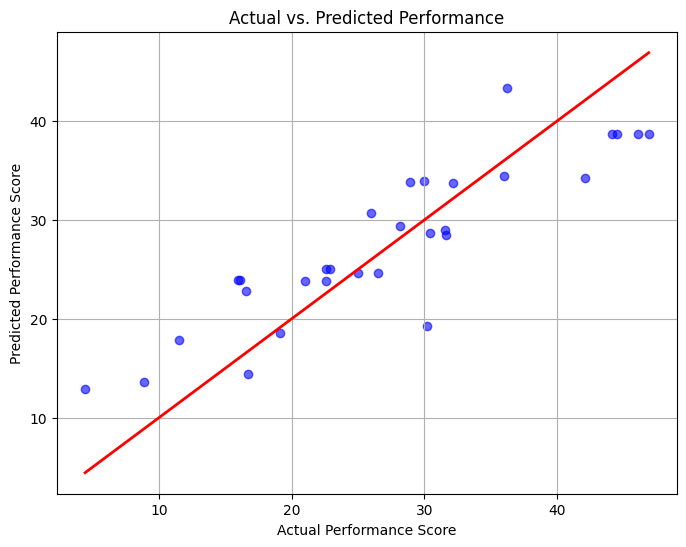

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Performance Score')
plt.ylabel('Predicted Performance Score')
plt.title('Actual vs. Predicted Performance')
plt.grid(True)
plt.show()

In [55]:
from sklearn.linear_model import Ridge

# Ridge Regression (L2 regularization)
ridge_model = Ridge(alpha=1.0)  # Increase alpha for smaller coefficients
ridge_model.fit(X_train_scaled, y_train)
y_train_pred = ridge_model.predict(X_train_scaled)
y_pred = ridge_model.predict(X_test_scaled)

print("Mean Squared Error train :", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error train :", mean_absolute_error(y_train, y_train_pred))
print("R² Score train:", r2_score(y_train, y_train_pred))
print("Ridge Coefficients:", ridge_model.coef_)
print("Ridge Intercepts:", ridge_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error train : 27.932542604285665
Mean Absolute Error train : 4.455628653075648
R² Score train: 0.7400656133343084
Ridge Coefficients: [ 5.30231173 -2.59853979 -1.97108732  0.88283544  0.8519833   5.3669365
  3.89264815 -0.78553074 -4.94787981]
Ridge Intercepts: 28.178916666666634
Mean Squared Error: 27.716333105573614
Mean Absolute Error: 4.448657745927384
R² Score: 0.7659206037366595


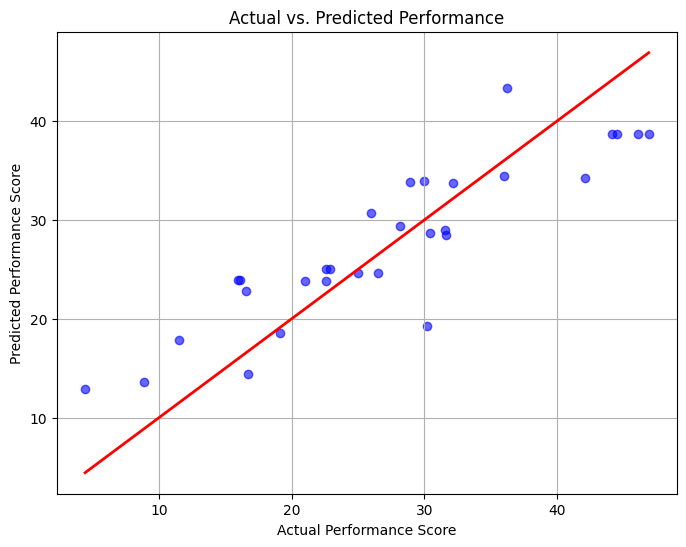

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual Performance Score')
plt.ylabel('Predicted Performance Score')
plt.title('Actual vs. Predicted Performance')
plt.grid(True)
plt.show()

Decision tree

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)
y_train_pred_dt = dt_model.predict(X_train_scaled)
print("Decision Tree:")
print("Mean Squared Error train :", mean_squared_error(y_train, y_train_pred_dt))
print("Mean Absolute Error train :", mean_absolute_error(y_train, y_train_pred_dt))
print("R² Score train:", r2_score(y_train, y_train_pred_dt))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))


Decision Tree:
Mean Squared Error train : 1.623173728174603
Mean Absolute Error train : 0.8688853174603175
R² Score train: 0.984895085511471
Mean Squared Error: 4.873639538435375
Mean Absolute Error: 1.582895238095238
R² Score: 0.9588394829714078


Performance of Decision Tree

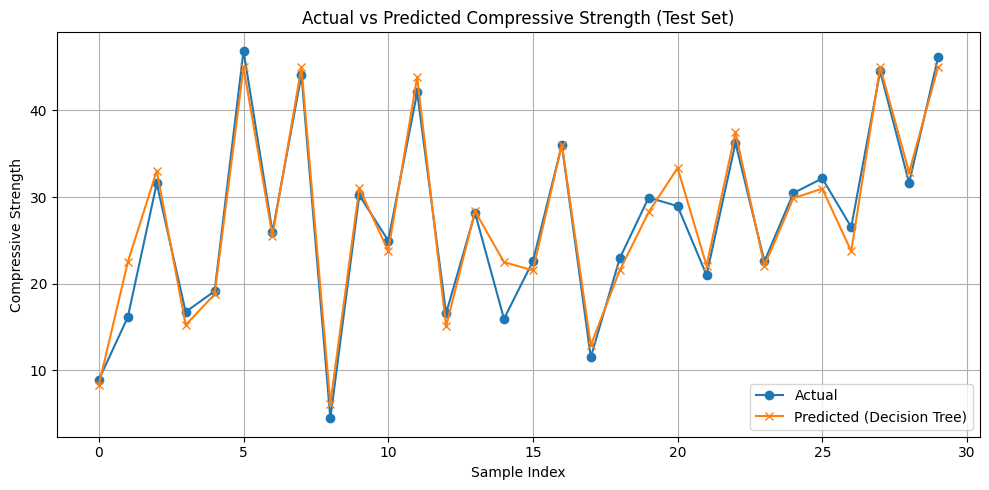

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_dt, label='Predicted (Decision Tree)', marker='x')
plt.title('Actual vs Predicted Compressive Strength (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('Compressive Strength')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Visualization of Decision Tree

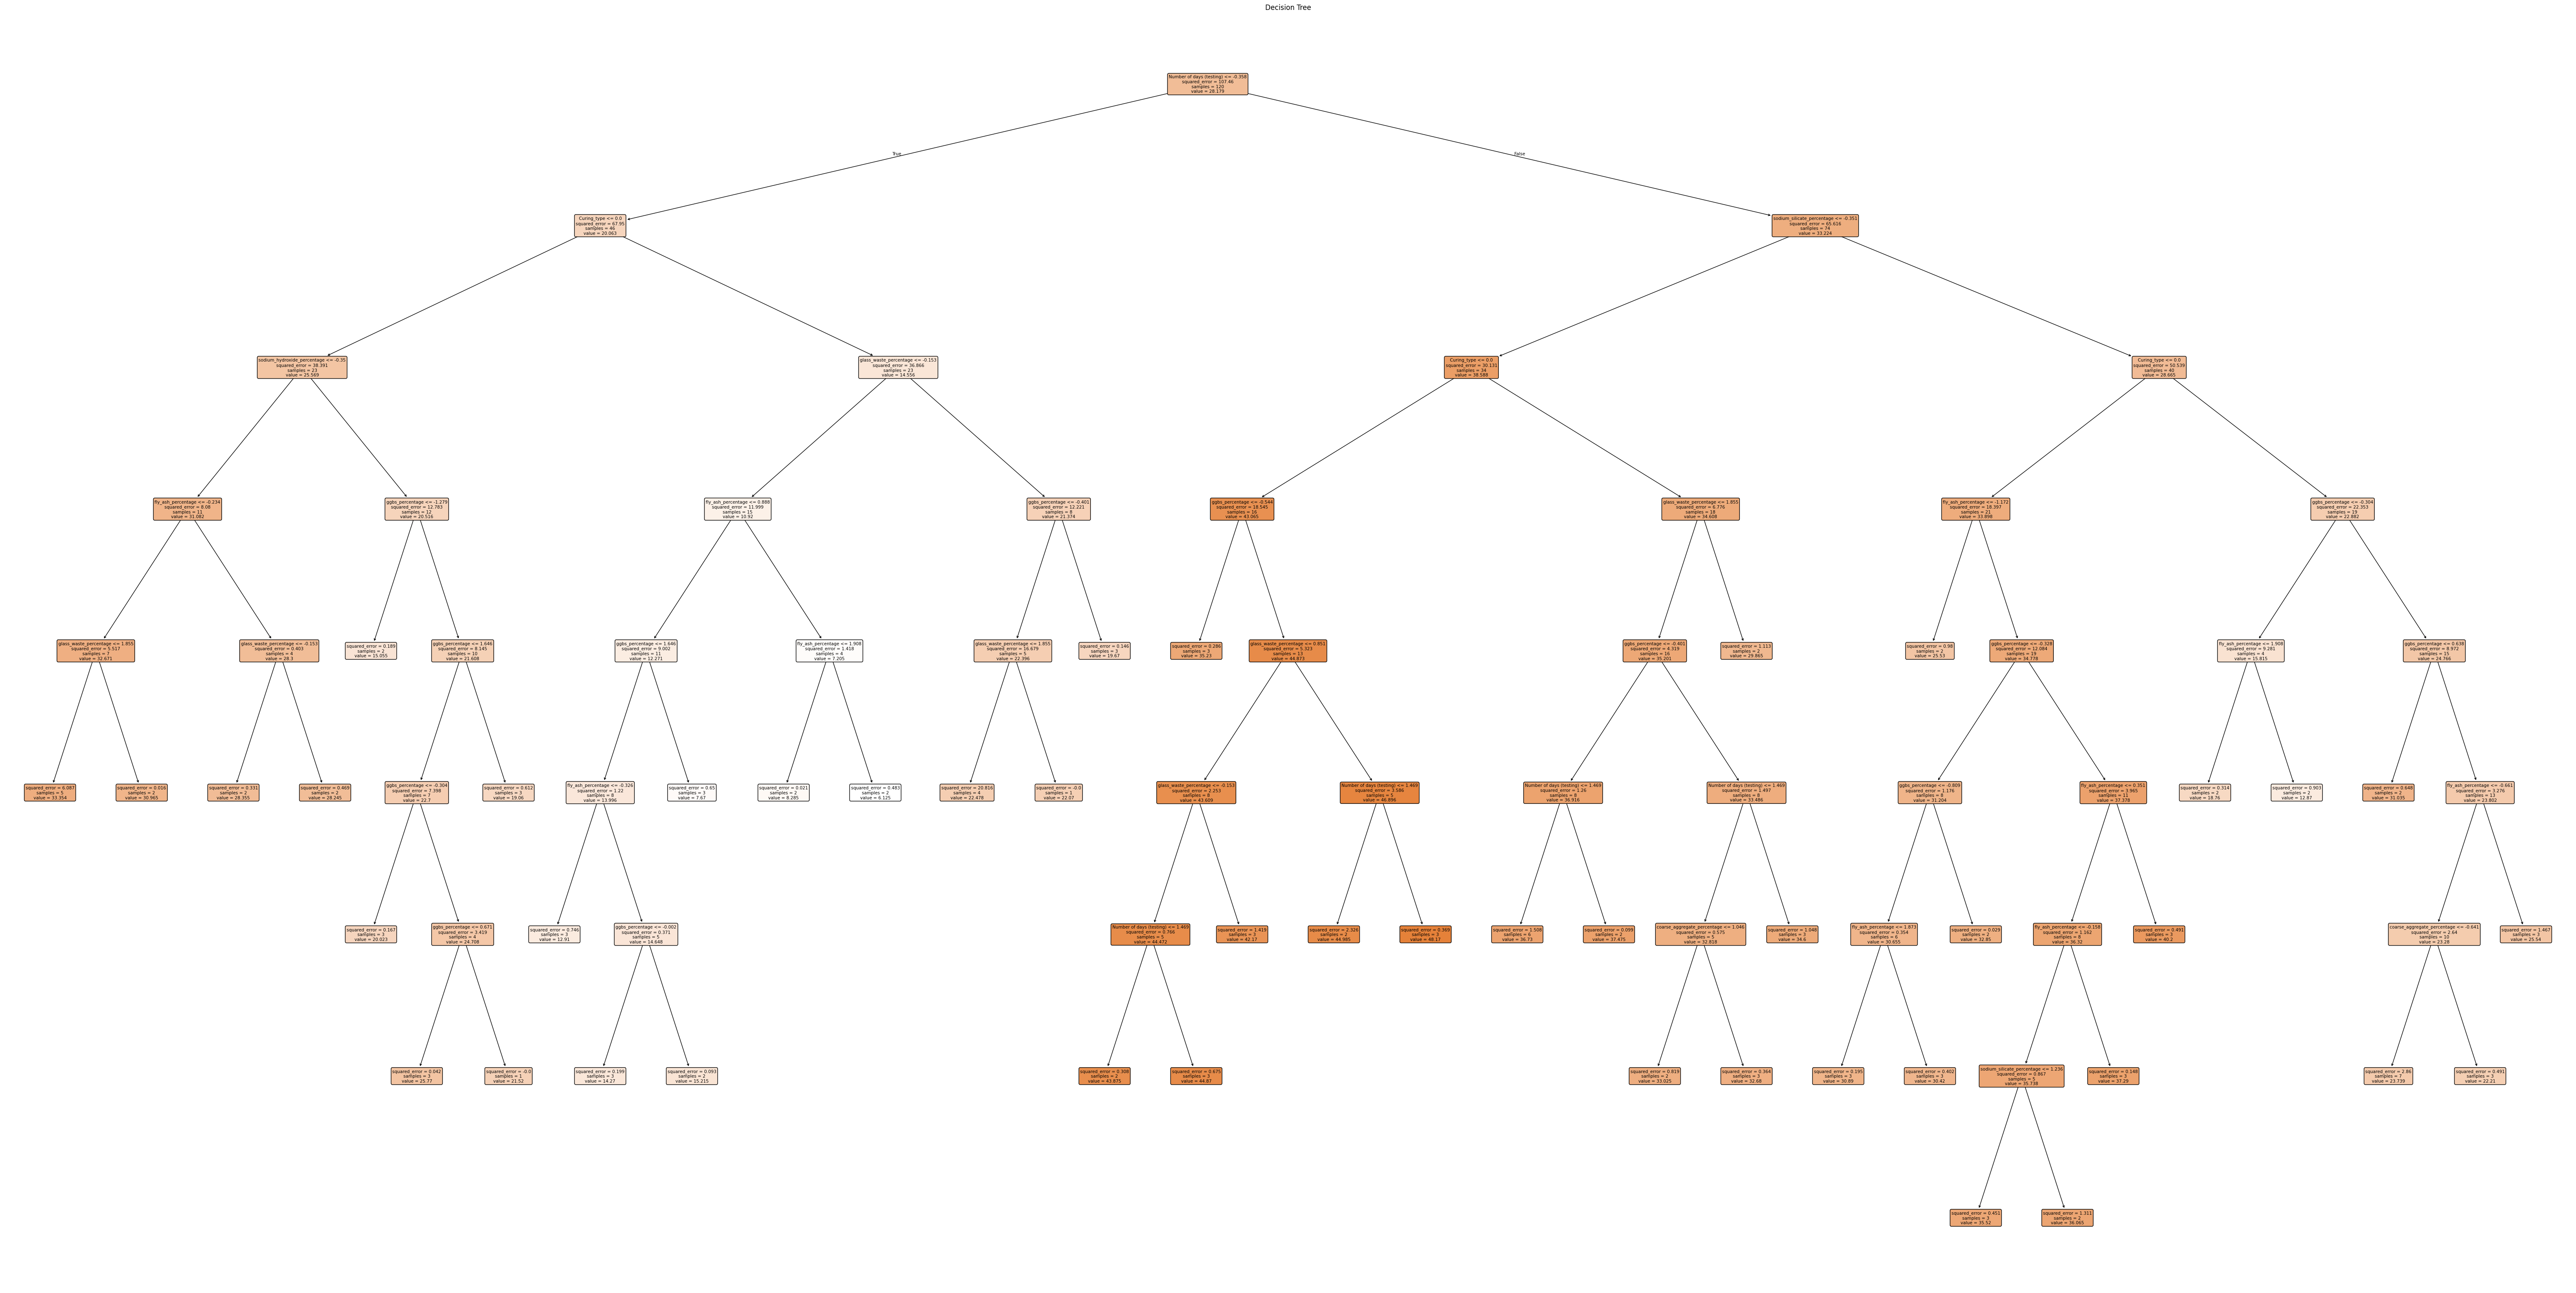

In [38]:
plt.figure(figsize=(80, 40))  # Resize for better readability
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

Decision Tree importance features

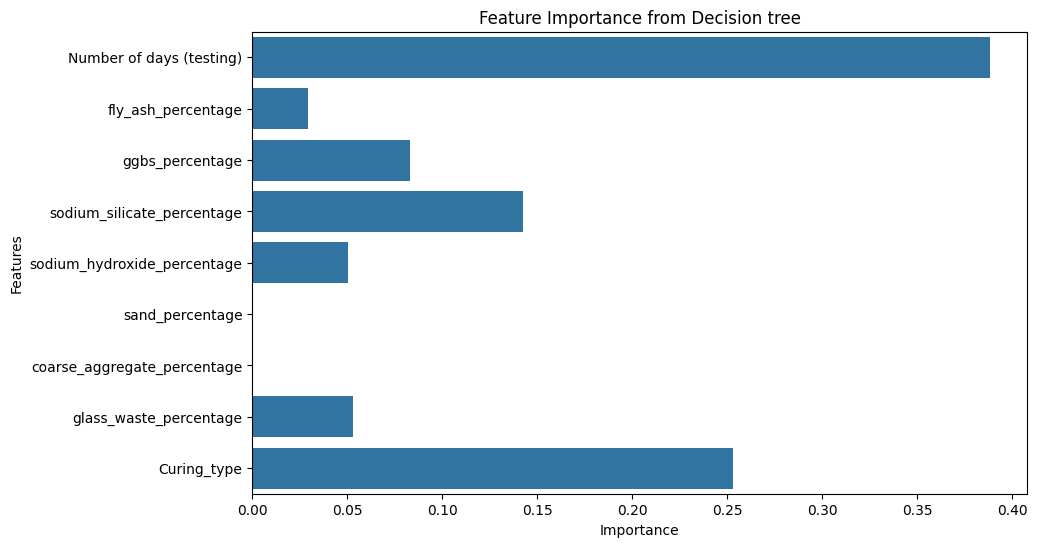

In [39]:
# Feature importance
dt_importances = dt_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=dt_importances, y=feature_names)
plt.title('Feature Importance from Decision tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Random Forest

In [40]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

y_train_pred_rf = dt_model.predict(X_train_scaled)
print("\nRandom Forest:")

print("Mean Squared Error train :", mean_squared_error(y_train, y_train_pred_rf))
print("Mean Absolute Error train :", mean_absolute_error(y_train, y_train_pred_rf))
print("R² Score train:", r2_score(y_train, y_train_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))




Random Forest:
Mean Squared Error train : 1.623173728174603
Mean Absolute Error train : 0.8688853174603175
R² Score train: 0.984895085511471
Mean Squared Error: 4.715915948710806
Mean Absolute Error: 1.501437921606169
R² Score: 0.9601715438366955


Performance of Random Forest

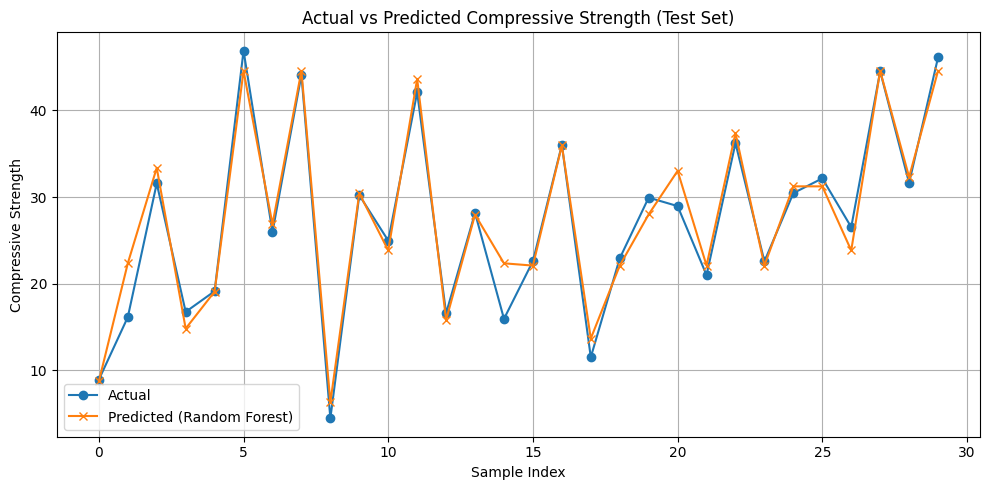

In [41]:
# Plot actual vs predicted for test set
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual',marker='o')
plt.plot(y_pred_rf, label='Predicted (Random Forest)', marker='x')
plt.title('Actual vs Predicted Compressive Strength (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('Compressive Strength')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Random Forest importance features

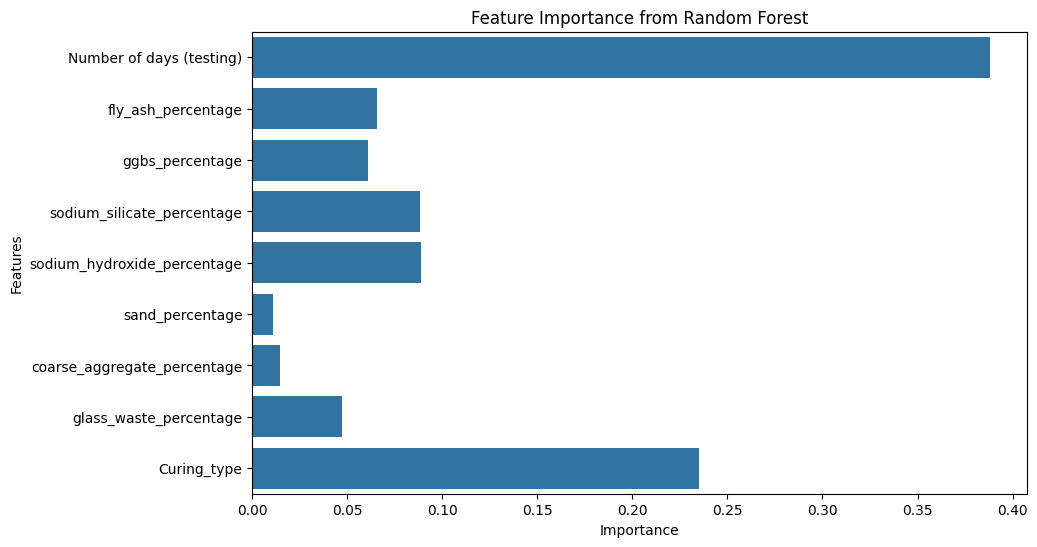

In [42]:
# Feature importance
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

ADA Boost

In [43]:
ada_model = AdaBoostRegressor(random_state=42, n_estimators=100)
ada_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_ada = ada_model.predict(X_train_scaled)
y_test_pred_ada = ada_model.predict(X_test_scaled)

# Evaluation
print("=== AdaBoost Training Metrics ===")
print("MSE:", mean_squared_error(y_train, y_train_pred_ada))
print("MAE:", mean_absolute_error(y_train, y_train_pred_ada))
print("R²:", r2_score(y_train, y_train_pred_ada))

print("\n=== AdaBoost Test Metrics ===")
print("MSE:", mean_squared_error(y_test, y_test_pred_ada))
print("MAE:", mean_absolute_error(y_test, y_test_pred_ada))
print("R²:", r2_score(y_test, y_test_pred_ada))

=== AdaBoost Training Metrics ===
MSE: 8.588438614372395
MAE: 2.501617496214544
R²: 0.9200777904371544

=== AdaBoost Test Metrics ===
MSE: 8.221795428384745
MAE: 2.3487180995117836
R²: 0.9305624989154869


Performance of Ada Boost

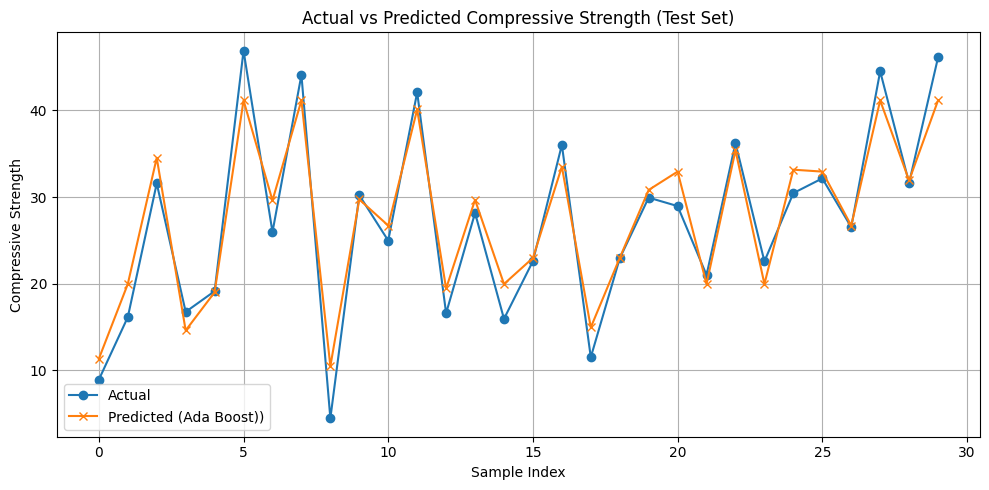

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual',marker='o')
plt.plot(y_test_pred_ada, label='Predicted (Ada Boost))', marker='x')
plt.title('Actual vs Predicted Compressive Strength (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('Compressive Strength')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Feature Importance of Ada Boost

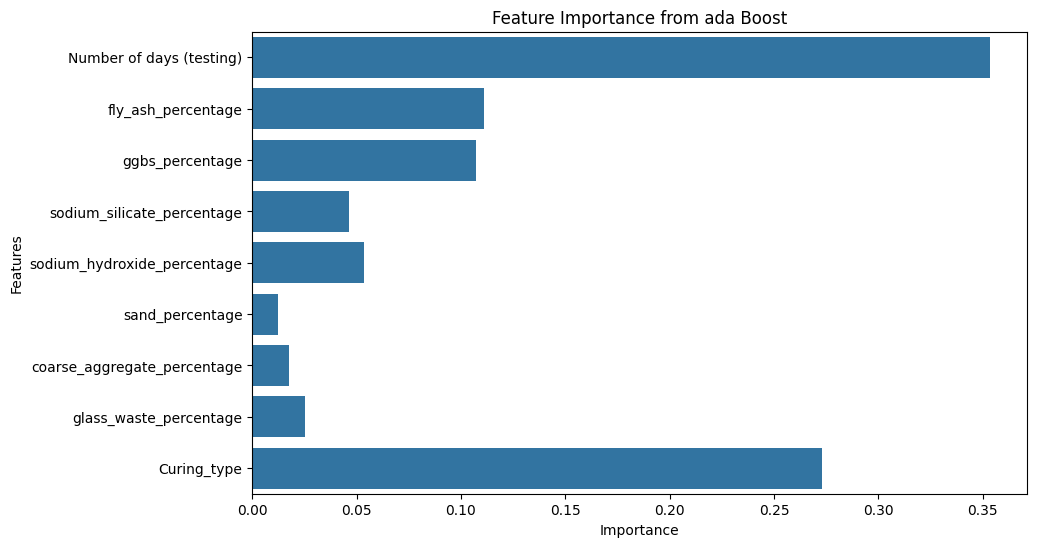

In [45]:
importances = ada_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance from ada Boost')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

Support Vector Regressor

In [46]:
svr_model = SVR(kernel='rbf', C=100, gamma='scale')  # RBF kernel is commonly effective
svr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_svr = svr_model.predict(X_train_scaled)
y_test_pred_svr = svr_model.predict(X_test_scaled)

# Evaluation
print("=== SVR Training Metrics ===")
print("MSE:", mean_squared_error(y_train, y_train_pred_svr))
print("MAE:", mean_absolute_error(y_train, y_train_pred_svr))
print("R²:", r2_score(y_train, y_train_pred_svr))

print("\n=== SVR Test Metrics ===")
print("MSE:", mean_squared_error(y_test, y_test_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_test_pred_svr))
print("R²:", r2_score(y_test, y_test_pred_svr))


=== SVR Training Metrics ===
MSE: 2.092019063268113
MAE: 0.8729744739398141
R²: 0.9805321090955716

=== SVR Test Metrics ===
MSE: 7.303559483385846
MAE: 1.7970209468714071
R²: 0.9383174971980489


Performace of SVR

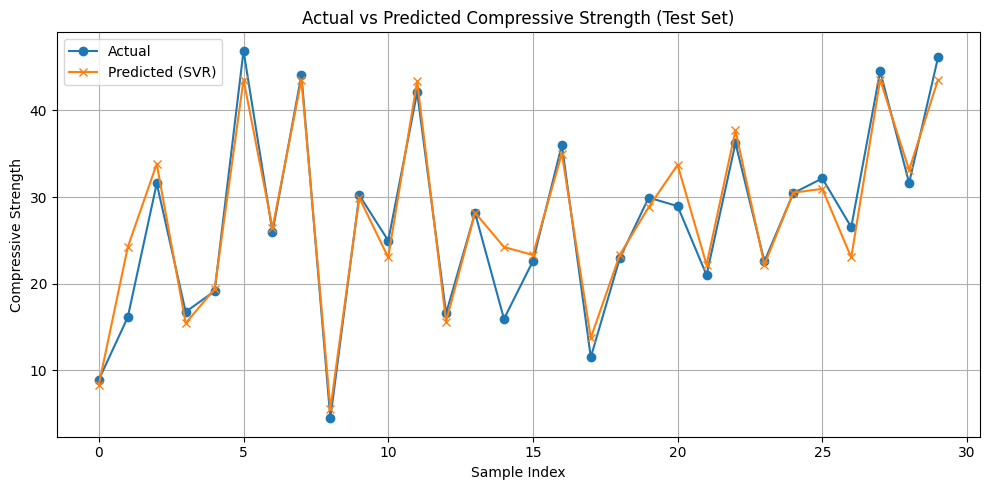

In [47]:
# Plot actual vs predicted for test set
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual',marker='o')
plt.plot(y_test_pred_svr, label='Predicted (SVR)', marker='x')
plt.title('Actual vs Predicted Compressive Strength (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('Compressive Strength')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

KNN

In [48]:
# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=1)
knn_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_knn = knn_model.predict(X_train_scaled)
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Evaluation
print("=== KNN Training Metrics ===")
print("MSE:", mean_squared_error(y_train, y_train_pred_knn))
print("MAE:", mean_absolute_error(y_train, y_train_pred_knn))
print("R²:", r2_score(y_train, y_train_pred_knn))

print("\n=== KNN Test Metrics ===")
print("MSE:", mean_squared_error(y_test, y_test_pred_knn))
print("MAE:", mean_absolute_error(y_test, y_test_pred_knn))
print("R²:", r2_score(y_test, y_test_pred_knn))

=== KNN Training Metrics ===
MSE: 2.743474166666667
MAE: 0.9650833333333335
R²: 0.9744698044518061

=== KNN Test Metrics ===
MSE: 7.5045166666666665
MAE: 1.974333333333333
R²: 0.9366203052947053


Performace of KNN

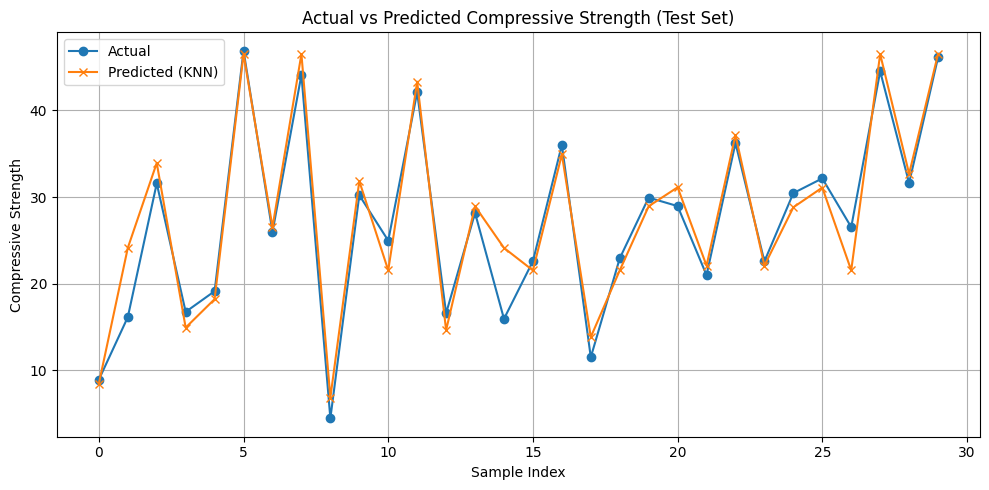

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual',marker='o')
plt.plot(y_test_pred_knn, label='Predicted (KNN)', marker='x')
plt.title('Actual vs Predicted Compressive Strength (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('Compressive Strength')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Saving the Model

In [50]:
import pickle

In [51]:
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(lr_model, file)

with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

with open('ada_boost_model.pkl', 'wb') as file:
    pickle.dump(ada_model,file)

with open('svr_model.pkl', 'wb') as file:
    pickle.dump(svr_model, file)

with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

# Save your scaler
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ridge_model, file)
with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso_model, file)
with open('elastic_model.pkl', 'wb') as file:
    pickle.dump(elastic, file)

In [52]:
# prompt: now I want to test all the models with my own data. take input from me not excel file

def get_user_input():
  """Gets user input for the features needed for prediction."""
  print("Please enter the values for the following features:")
  days_testing = float(input("Number of days (testing): "))
  fly_ash = float(input("Fly ash weight: "))
  ggbs = float(input("GGBS weight: "))
  ss = float(input("SS weight: "))
  sh = float(input("SH weight: "))
  sand = float(input("Sand weight: "))
  coarse_aggregate = float(input("Coarse aggregate weight: "))
  glass_waste_powder = float(input("Glass waste powder weight: "))
  curing_type_input = input("Curing type (Oven/Outdoor): ").strip().lower()
  curing_type = 0 if curing_type_input == 'oven' else 1 if curing_type_input == 'outdoor' else None

  if curing_type is None:
    print("Invalid curing type entered. Please enter 'Oven' or 'Outdoor'.")
    return None

  total_sum = fly_ash + ggbs + ss + sh + sand + coarse_aggregate + glass_waste_powder

  fly_ash_percentage = np.round(fly_ash / total_sum * 100, 2)
  ggbs_percentage = np.round(ggbs / total_sum * 100, 2)
  sodium_silicate_percentage = np.round(ss / total_sum * 100, 2)
  sodium_hydroxide_percentage = np.round(sh / total_sum * 100, 2)
  sand_percentage = np.round(sand / total_sum * 100, 2)
  coarse_aggregate_percentage = np.round(coarse_aggregate / total_sum * 100, 2)
  glass_waste_percentage = np.round(glass_waste_powder / total_sum * 100, 2)

  user_data = pd.DataFrame({
      'Number of days (testing)': [days_testing],
      'fly_ash_percentage': [fly_ash_percentage],
      'ggbs_percentage': [ggbs_percentage],
      'sodium_silicate_percentage': [sodium_silicate_percentage],
      'sodium_hydroxide_percentage': [sodium_hydroxide_percentage],
      'sand_percentage': [sand_percentage],
      'coarse_aggregate_percentage': [coarse_aggregate_percentage],
      'glass_waste_percentage': [glass_waste_percentage],
      'Curing_type': [curing_type]
  })
  return user_data

# Load the scaler
try:
  with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
except FileNotFoundError:
  print("Scaler not found. Please ensure 'scaler.pkl' exists.")
  scaler = None # Or re-fit a scaler if you have access to the training data

# Load the models
models = {}
model_files = {
    'Linear Regression': 'linear_regression_model.pkl',
    'Decision Tree': 'decision_tree_model.pkl',
    'Random Forest': 'random_forest_model.pkl',
    'Ada Boost': 'ada_boost_model.pkl',
    'SVR': 'svr_model.pkl',
    'KNN': 'knn_model.pkl'
}

for name, file in model_files.items():
  try:
    with open(file, 'rb') as f:
      models[name] = pickle.load(f)
  except FileNotFoundError:
    print(f"Model file '{file}' not found. Skipping {name}.")
    models[name] = None


# Get user input
user_data = get_user_input()

if user_data is not None and scaler is not None:
  # Scale the user input
  user_data_scaled = scaler.transform(user_data)

  print("\n--- Predictions on User Input ---")
  for name, model in models.items():
    if model is not None:
      prediction = model.predict(user_data_scaled)
      print(f"{name} Prediction: {prediction[0]:.2f}")


Please enter the values for the following features:


KeyboardInterrupt: Interrupted by user